In [3]:
include("helpers.jl")
include("simple.jl")

simple3_init (generic function with 1 method)

In [11]:
using Plots

In [22]:
function simple1_constraints(x::Vector)
    return [x[1] + x[2]^2 - 1,
            -x[1] - x[2]]
end

simple1_constraints (generic function with 1 method)

In [28]:
xr = Vector(-3:0.1:3)
yr = Vector(-3:0.1:3)
v = [[a,b] for (a,b) in zip(xr, yr)];
v[1:3,:]

3×1 Matrix{Vector{Float64}}:
 [-3.0, -3.0]
 [-2.9, -2.9]
 [-2.8, -2.8]

In [38]:
# function simple1(x::Vector)
#     return -x[1] * x[2] + 2.0 / (3.0 * sqrt(3.0))
# end
# k= [simple1([a,b]) for a=xr, b=yr]

In [39]:
# simple1_constraints(v[1])
c= [simple1_constraints([a,b]) for a=xr, b=yr]
c[1:3, :]

3×61 Matrix{Vector{Float64}}:
 [5.0, 6.0]  [4.41, 5.9]  [3.84, 5.8]  …  [4.41, 0.1]   [5.0, 0.0]
 [5.1, 5.9]  [4.51, 5.8]  [3.94, 5.7]     [4.51, 0.0]   [5.1, -0.1]
 [5.2, 5.8]  [4.61, 5.7]  [4.04, 5.6]     [4.61, -0.1]  [5.2, -0.2]

In [106]:
length(c[1,1])

2

In [43]:
# c1 = [c[i][1] for i = 1:length(c)]
# x2 = [xhist[i][2] for i = 1:length(xhist)]

In [85]:
c1 = []
c2 = []
s1 = size(c,1)
s2 = size(c,2)
for row = 1:s1
    for col = 1:s2
        # println(c[row, col])
        push!(c1, c[row, col][1])
        push!(c2, c[row, col][2])
    end
end
c1 = reshape(c1, s1, s2)';
c2 = reshape(c2, s1, s2)';


In [86]:
c2

61×61 adjoint(::Matrix{Any}) with eltype Any:
 6.0   5.9   5.8   5.7   5.6   5.5  …   0.5   0.4   0.3   0.2   0.1   0.0
 5.9   5.8   5.7   5.6   5.5   5.4      0.4   0.3   0.2   0.1   0.0  -0.1
 5.8   5.7   5.6   5.5   5.4   5.3      0.3   0.2   0.1   0.0  -0.1  -0.2
 5.7   5.6   5.5   5.4   5.3   5.2      0.2   0.1   0.0  -0.1  -0.2  -0.3
 5.6   5.5   5.4   5.3   5.2   5.1      0.1   0.0  -0.1  -0.2  -0.3  -0.4
 5.5   5.4   5.3   5.2   5.1   5.0  …   0.0  -0.1  -0.2  -0.3  -0.4  -0.5
 5.4   5.3   5.2   5.1   5.0   4.9     -0.1  -0.2  -0.3  -0.4  -0.5  -0.6
 5.3   5.2   5.1   5.0   4.9   4.8     -0.2  -0.3  -0.4  -0.5  -0.6  -0.7
 5.2   5.1   5.0   4.9   4.8   4.7     -0.3  -0.4  -0.5  -0.6  -0.7  -0.8
 5.1   5.0   4.9   4.8   4.7   4.6     -0.4  -0.5  -0.6  -0.7  -0.8  -0.9
 ⋮                             ⋮    ⋱   ⋮                             ⋮
 0.8   0.7   0.6   0.5   0.4   0.3     -4.7  -4.8  -4.9  -5.0  -5.1  -5.2
 0.7   0.6   0.5   0.4   0.3   0.2     -4.8  -4.9  -5.0  -5.1  -5.2 

In [80]:
c1_filt = ifelse.(c1 .< 0, c1, 0);


In [88]:
c2_filt = ifelse.(c2 .< 0, c2, 0)

61×61 Matrix{Real}:
 0   0     0     0     0     0     0    …   0     0     0     0     0     0
 0   0     0     0     0     0     0        0     0     0     0     0    -0.1
 0   0     0     0     0     0     0        0     0     0     0    -0.1  -0.2
 0   0     0     0     0     0     0        0     0     0    -0.1  -0.2  -0.3
 0   0     0     0     0     0     0        0     0    -0.1  -0.2  -0.3  -0.4
 0   0     0     0     0     0     0    …   0    -0.1  -0.2  -0.3  -0.4  -0.5
 0   0     0     0     0     0     0       -0.1  -0.2  -0.3  -0.4  -0.5  -0.6
 0   0     0     0     0     0     0       -0.2  -0.3  -0.4  -0.5  -0.6  -0.7
 0   0     0     0     0     0     0       -0.3  -0.4  -0.5  -0.6  -0.7  -0.8
 0   0     0     0     0     0     0       -0.4  -0.5  -0.6  -0.7  -0.8  -0.9
 ⋮                           ⋮          ⋱   ⋮                             ⋮
 0   0     0     0     0     0     0       -4.7  -4.8  -4.9  -5.0  -5.1  -5.2
 0   0     0     0     0     0     0       -4.8 

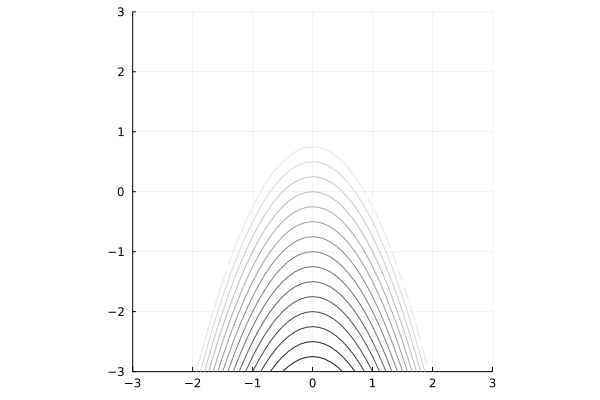

In [100]:
contour(xr, yr, c1_filt, xlims=(-3,3), ylims=(-3,3),aspectratio=:equal, linecolor= cgrad(:grays), colorbar_entry=true)

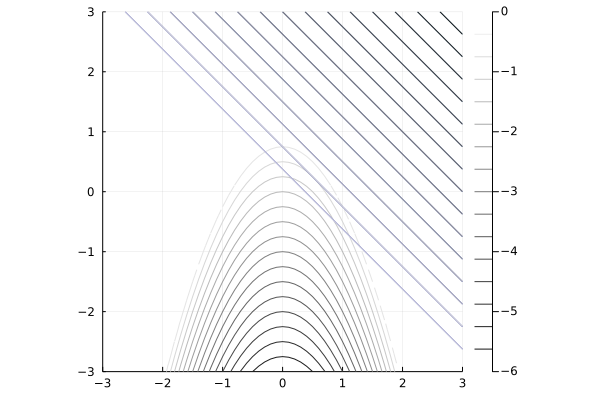

In [102]:
contour!(xr, yr, c2_filt, xlims=(-3,3), ylims=(-3,3),aspectratio=:equal, colorbar_entry=true, linecolor= cgrad(:greys))

In [ ]:
# alternatively solve for this region, and plot xs there..